In [1]:
import uproot
import pandas as pd
import awkward as ak

In [12]:
filename="/work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/EventSample/MassScan_HZ4l_HLFV/HZ4l_HLFV_1M_HMass160_Seed160/HZ4l_HLFV_1M_HMass160_Seed160_IDEA.root"
data_column=[
 'Particle.PID',
 'Particle.Status',
 'Particle.IsPU',
 'Particle.M1',
 'Particle.M2',
 'Particle.D1',
 'Particle.D2',
 'Particle.Charge',
 'Particle.Mass',
 'Particle.E',
 'Particle.Px',
 'Particle.Py',
 'Particle.Pz',
 'Particle.P',
 'Particle.PT',
 'Particle.Eta',
 'Particle.Phi',
 'Particle.Rapidity',
 'Particle.T',
 'Particle.X',
 'Particle.Y',
 'Particle.Z',
 'Particle_size',]
with uproot.open(filename) as file:
    a=file["Delphes"]
    tree=a.arrays(data_column,library="ak")


In [15]:
b=tree["Particle.PT"][(tree["Particle.Status"]==1) & (tree["Particle.PID"]!=22)]

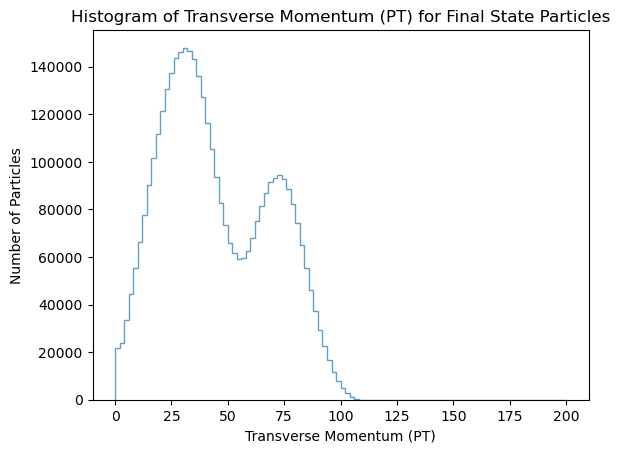

In [23]:
import matplotlib.pyplot as plt
plt.hist(ak.flatten(b,axis=1), bins=100, range=(0, 200), histtype='step', alpha=0.7)
plt.xlabel('Transverse Momentum (PT)')
plt.ylabel('Number of Particles')
plt.title('Histogram of Transverse Momentum (PT) for Final State Particles')
# plt.grid(True)
plt.show()

In [36]:
maskhiggs= (tree["Particle.PID"]==25)
higgsd1_idx= tree["Particle.D1"][maskhiggs]
higgsd2_idx= tree["Particle.D2"][maskhiggs]
higgd1_pt= tree["Particle.PT"][higgsd1_idx]
higgd2_pt= tree["Particle.PT"][higgsd2_idx]
maskZ= (tree["Particle.PID"]==23)
Zd1_idx= tree["Particle.D1"][maskZ]
Zd2_idx= tree["Particle.D2"][maskZ]
Zd1_pt= tree["Particle.PT"][Zd1_idx]
Zd2_pt= tree["Particle.PT"][Zd2_idx]

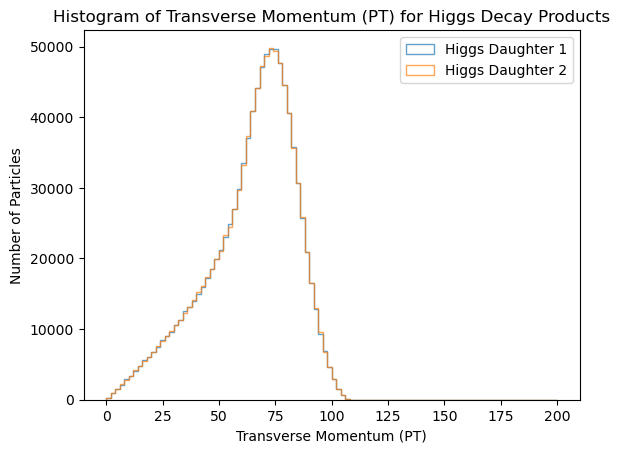

In [30]:
plt.hist(ak.flatten(higgd1_pt,axis=1), bins=100, range=(0, 200), histtype='step', alpha=0.7, label='Higgs Daughter 1')
plt.hist(ak.flatten(higgd2_pt,axis=1), bins=100, range=(0, 200), histtype='step', alpha=0.7, label='Higgs Daughter 2')
plt.xlabel('Transverse Momentum (PT)')
plt.ylabel('Number of Particles')
plt.title('Histogram of Transverse Momentum (PT) for Higgs Decay Products')
plt.legend()
plt.show()

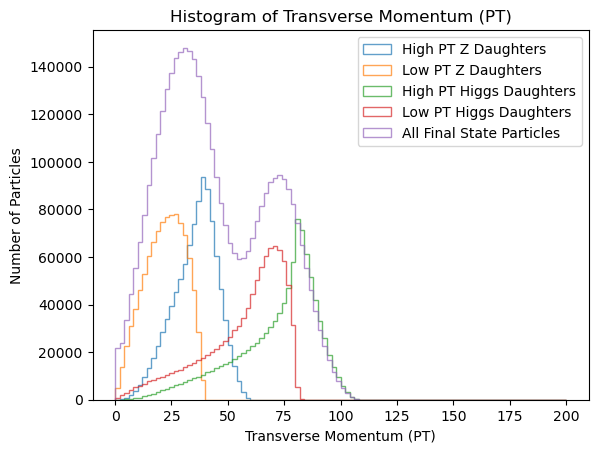

In [38]:
import numpy as np
# np.maximum(higgd1_pt,higgd2_pt)
plt.hist(ak.flatten(np.maximum(Zd1_pt,Zd2_pt),axis=1), bins=100, range=(0, 200), histtype='step', alpha=0.7, label='High PT Z Daughters')
plt.hist(ak.flatten(np.minimum(Zd1_pt,Zd2_pt),axis=1), bins=100, range=(0, 200), histtype='step', alpha=0.7, label='Low PT Z Daughters')
plt.hist(ak.flatten(np.maximum(higgd1_pt,higgd2_pt),axis=1), bins=100, range=(0, 200), histtype='step', alpha=0.7, label='High PT Higgs Daughters')
plt.hist(ak.flatten(np.minimum(higgd1_pt,higgd2_pt),axis=1), bins=100, range=(0, 200), histtype='step', alpha=0.7, label='Low PT Higgs Daughters')
plt.hist(ak.flatten(b,axis=1), bins=100, range=(0, 200), histtype='step', alpha=0.7, label='All Final State Particles')
plt.hist
plt.xlabel('Transverse Momentum (PT)')
plt.ylabel('Number of Particles')
plt.title('Histogram of Transverse Momentum (PT)')
plt.legend()
plt.show()